In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import pickle

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams['figure.figsize'] = 8, 6

In [10]:
mnist = pd.read_csv('data/mnist_to_pendigits.csv')
mnist.head()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,label
0,48,67,35,53,26,37,33,21,52,23,63,36,68,53,63,75,0
1,39,71,27,54,24,34,36,21,57,27,72,46,74,70,56,81,0
2,54,71,38,59,26,43,27,25,47,26,64,36,69,55,71,76,0
3,38,64,28,46,28,28,44,20,60,29,70,48,69,68,55,79,0
4,38,76,32,57,28,40,37,23,59,24,74,40,70,61,57,74,0


In [11]:
Xtest = mnist.drop('label', axis=1)
ytest = mnist.label

In [12]:
with open('svm.pkl', 'rb') as f:
    svm = pickle.load(f)
with open('tree.pkl', 'rb') as f:
    tree = pickle.load(f)
with open('knn.pkl', 'rb') as f:
    knn = pickle.load(f)

In [13]:
print('SVM accuracy: {}'.format(svm.score(Xtest, ytest)))
print('Decision Tree accuracy: {}'.format(tree.score(Xtest, ytest)))
print('KNN accuracy: {}'.format(knn.score(Xtest, ytest)))

SVM accuracy: 0.406
Decision Tree accuracy: 0.198
KNN accuracy: 0.662


In [ ]:
for model in [svm,tree,knn]:
    y_pred = model.predict(Xtest)
    print(model.__class__.__name__)
    print(classification_report(ytest, y_pred))
    sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

KNN


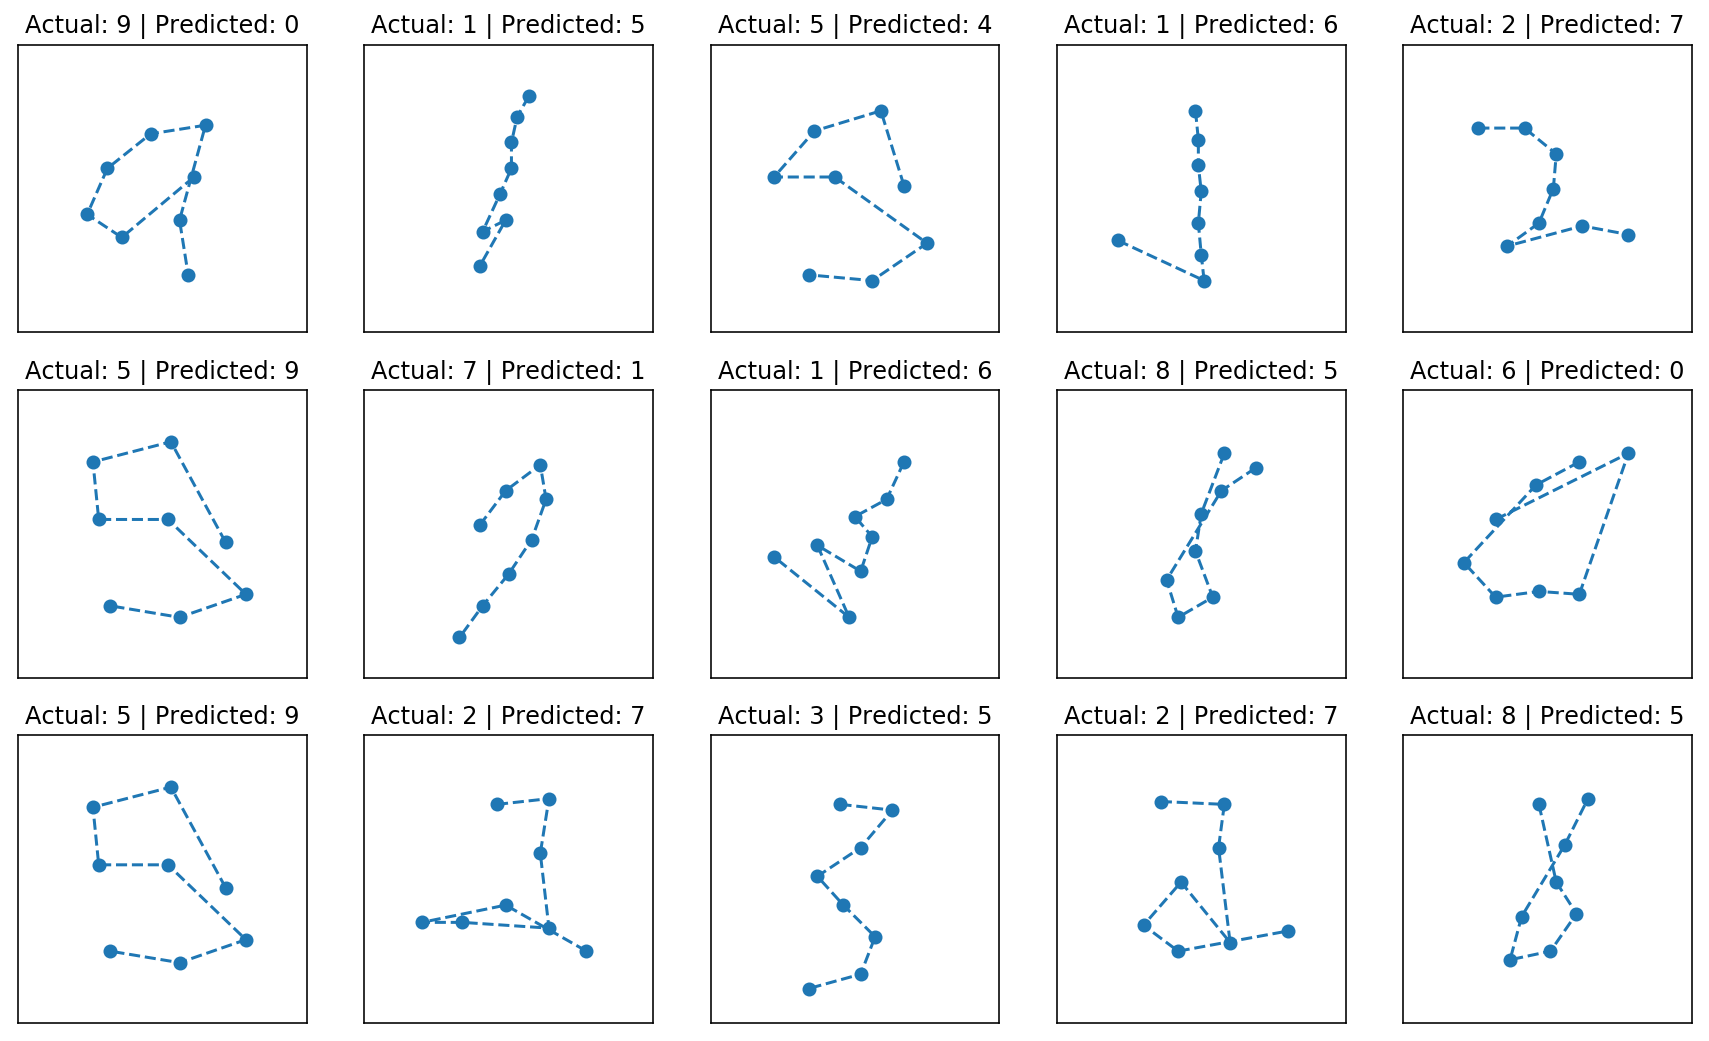

Decision Tree


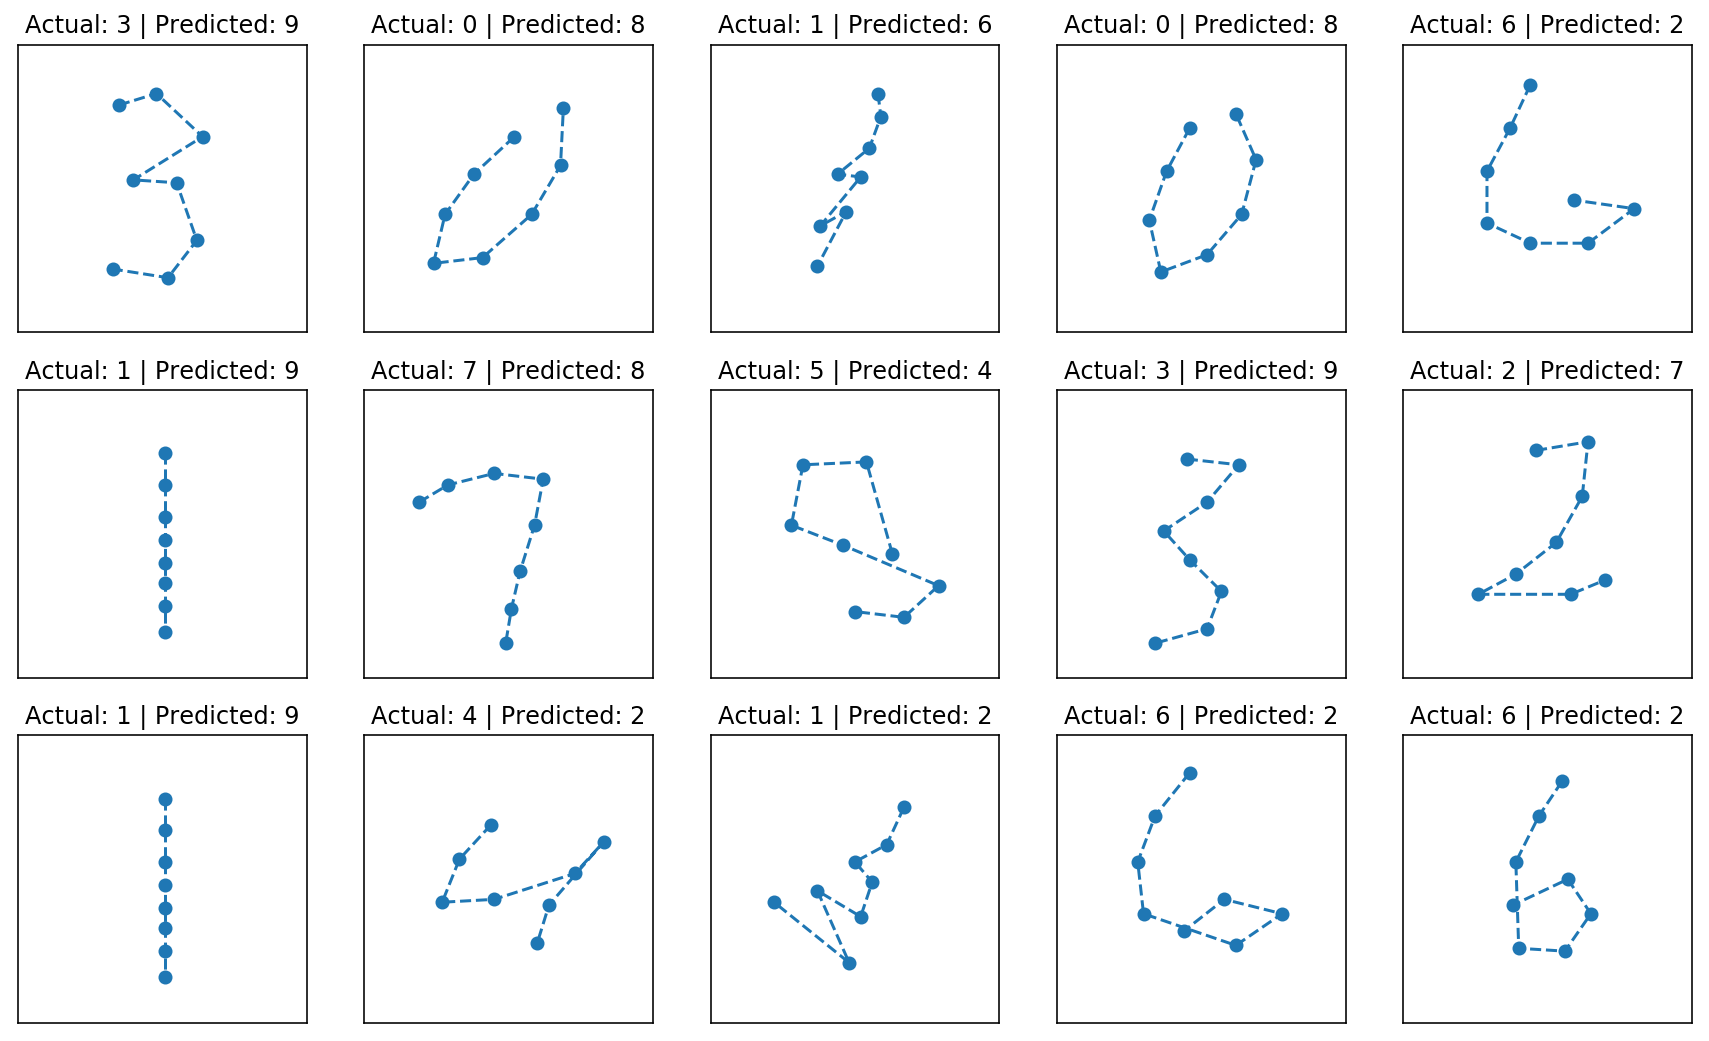

SVM


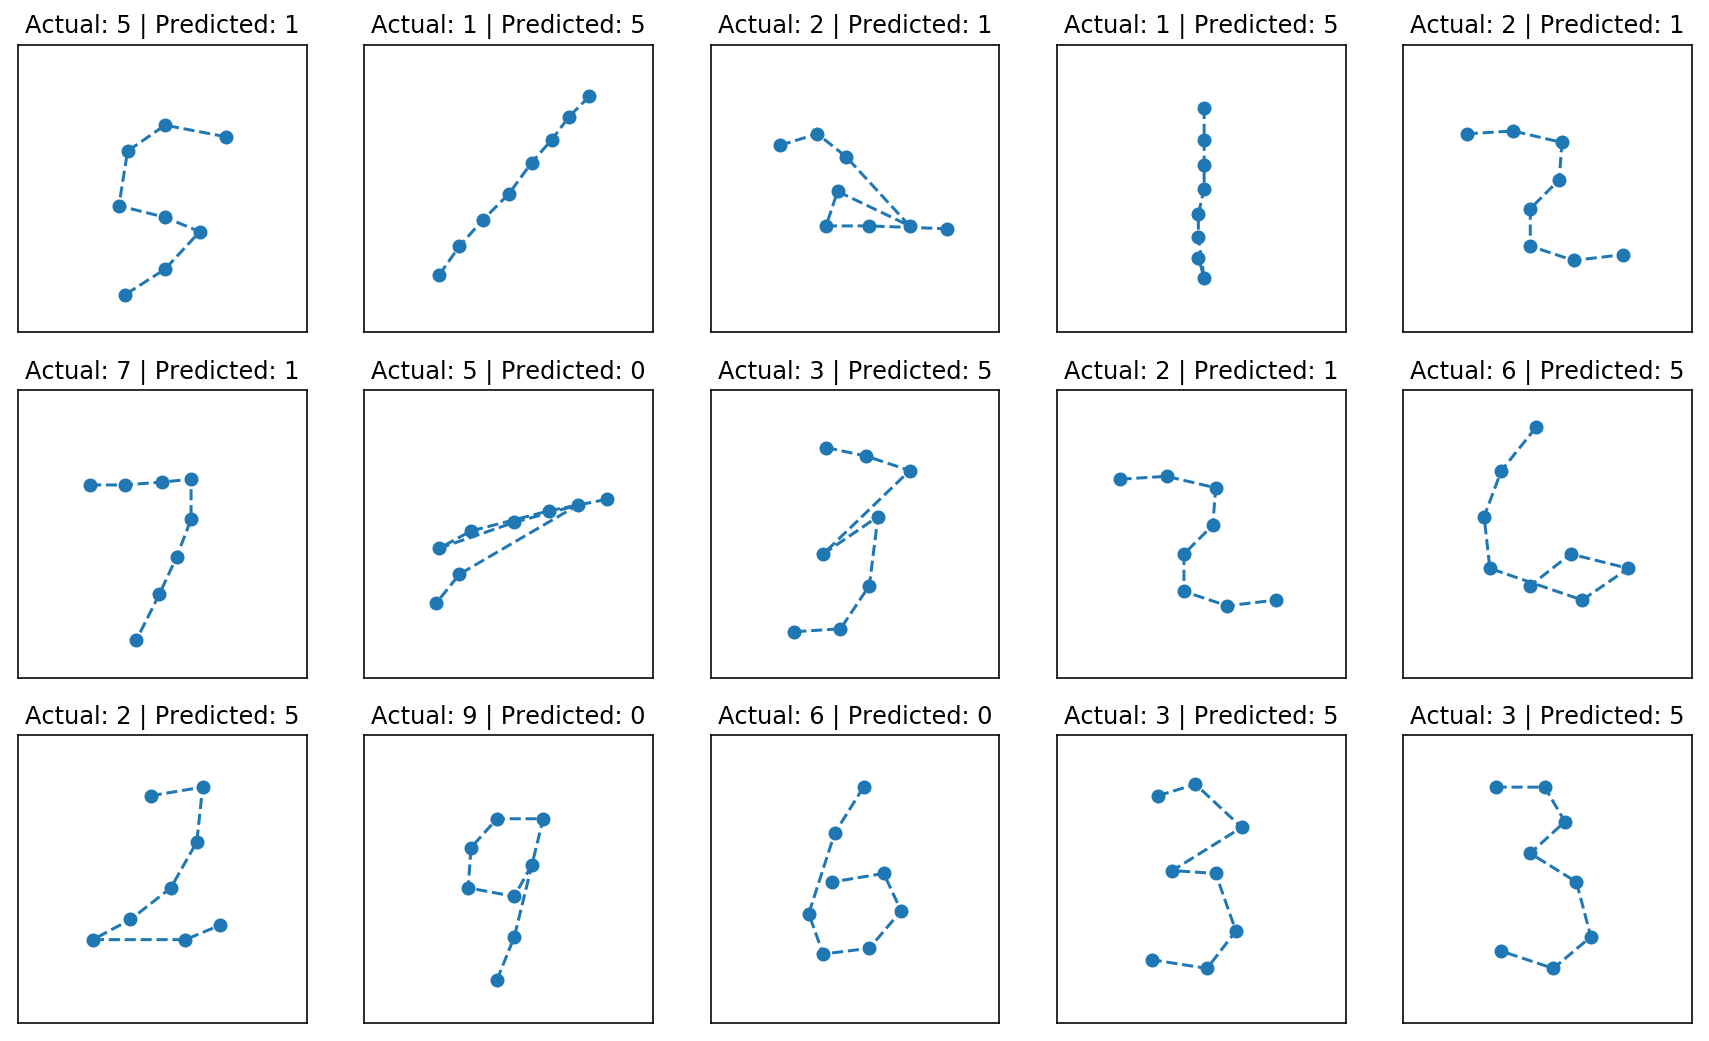

In [11]:
for model, name in [(knn, 'KNN'), (tree, 'Decision Tree'), (svm, 'SVM')]:
    np.random.seed(2)
    y_pred = model.predict(Xtest)
    misclassified = np.where(ytest!=y_pred)[0]
    r, c = 3,5
    samples = np.random.choice(misclassified, r*c)
    fig = plt.figure(figsize=(15,9))
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        p = Xtest.iloc[samples[i]].values.reshape((8,2))
        plt.plot(p[:,0],p[:,1],'--o')
        plt.title('Actual: '+str(ytest[samples[i]])+' | Predicted: '+str(y_pred[samples[i]]))
        plt.xlim((0,100))
        plt.ylim((0,100))
        plt.xticks([])
        plt.yticks([])
#     fig.suptitle('Examples misclassified by '+ name)
    print(name)
    plt.show()

In [12]:
mnist.groupby('label').max()

,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8
label,,,,,,,,,,,,,,,,
0,56,82,45,64,35,45,50,29,72,35,82,52,81,72,71,82
1,78,85,71,77,65,69,58,62,54,54,52,51,56,42,54,42
2,54,89,74,86,76,78,72,61,57,71,45,40,64,43,87,47
3,54,85,72,83,77,77,55,73,73,60,78,45,63,27,48,51
4,58,80,53,67,46,55,64,51,77,65,84,80,90,53,72,37
5,84,83,71,82,59,77,53,67,67,67,79,60,67,36,50,39
6,69,87,54,80,42,65,46,44,62,37,79,49,83,78,64,60
7,46,78,58,78,67,75,79,75,74,61,69,47,59,46,64,27
8,65,80,53,70,73,57,71,35,54,36,54,57,82,69,83,83


In [226]:
Xtest = mnist.drop('label', axis=1)
ytest = mnist.label

def get_boundary(coord):
    xmin = coord[:,0].min()
    xmax = coord[:,0].max()
    ymin = coord[:,1].min()
    ymax = coord[:,1].max()
    return xmin,ymin,xmax,ymax

def scale(coord):
    coord=coord.astype('float64')
    xmin,ymin,xmax,ymax = get_boundary(coord)
    x_o = (xmax + xmin)/2
    y_o = (ymax + ymin)/2
    coord -= [x_o,y_o]
    sc = 100/max(xmax-xmin, ymax-ymin)
    coord *= sc
    coord += 50
    return coord.astype('int64')

def plot_exfeatures(coord):
    plt.plot(coord[:,0],coord[:,1], '--o')

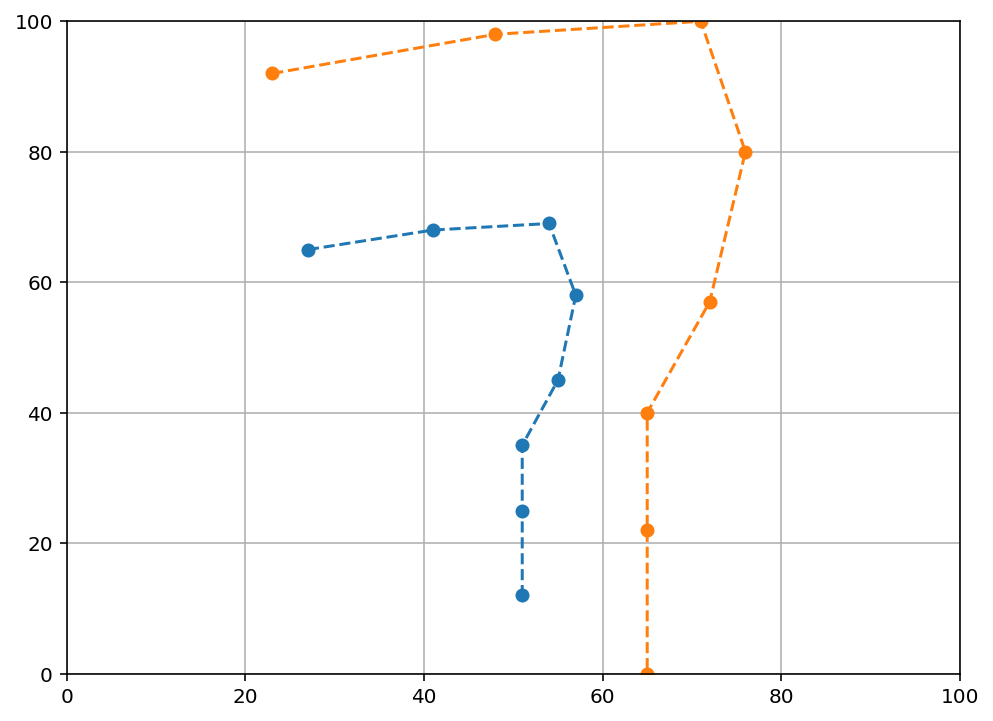

In [227]:
plot_exfeatures(Xtest.iloc[361].values.reshape((8,2)))
plt.xlim((0,100))
plt.ylim((0,100))
# plt.show()
plot_exfeatures(scale(Xtest.iloc[361].values.reshape((8,2))))
# plt.xlim((-50,50))
# plt.ylim((-50,50))
plt.grid()
plt.show()

In [228]:
for i in range(len(Xtest)):
    Xtest.loc[i]=scale(Xtest.loc[i].values.reshape((8,2))).ravel()

In [229]:
print('SVM accuracy: {}'.format(svm.score(Xtest, ytest)))
print('Decision Tree accuracy: {}'.format(tree.score(Xtest, ytest)))
print('KNN accuracy: {}'.format(knn.score(Xtest, ytest)))

# Without scaling
# SVM accuracy: 0.406
# Decision Tree accuracy: 0.198
# KNN accuracy: 0.662

SVM accuracy: 0.792
Decision Tree accuracy: 0.6
KNN accuracy: 0.826


SVC


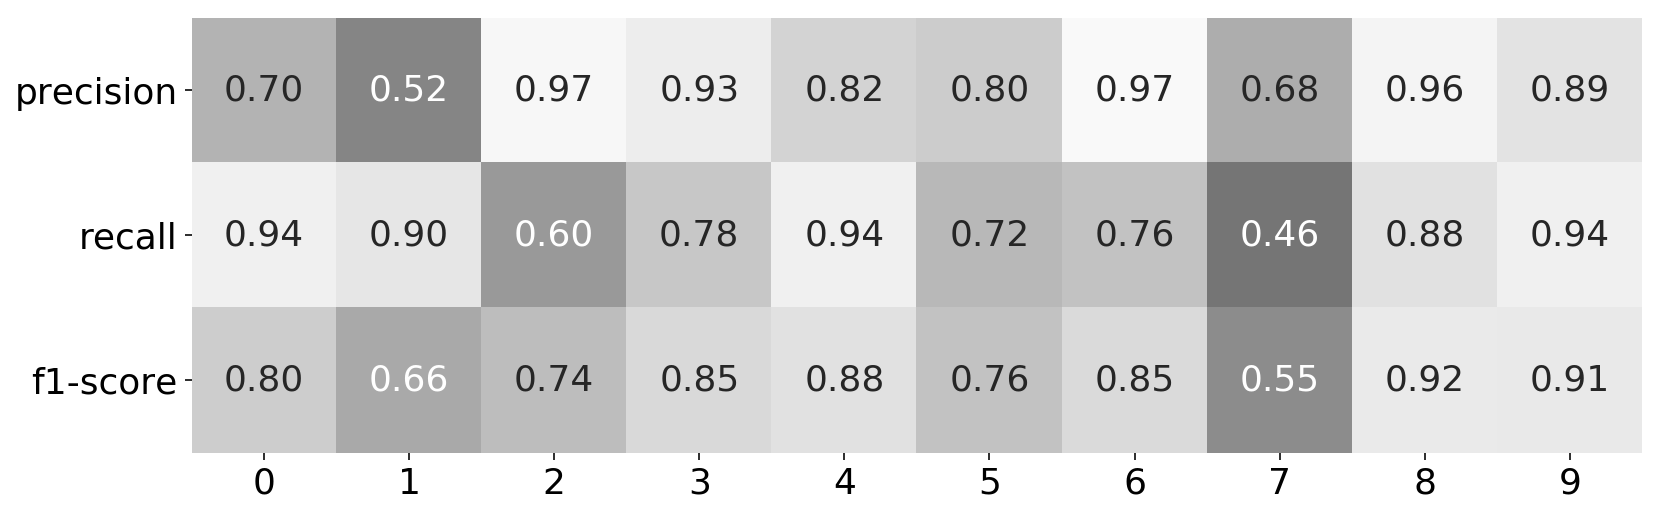

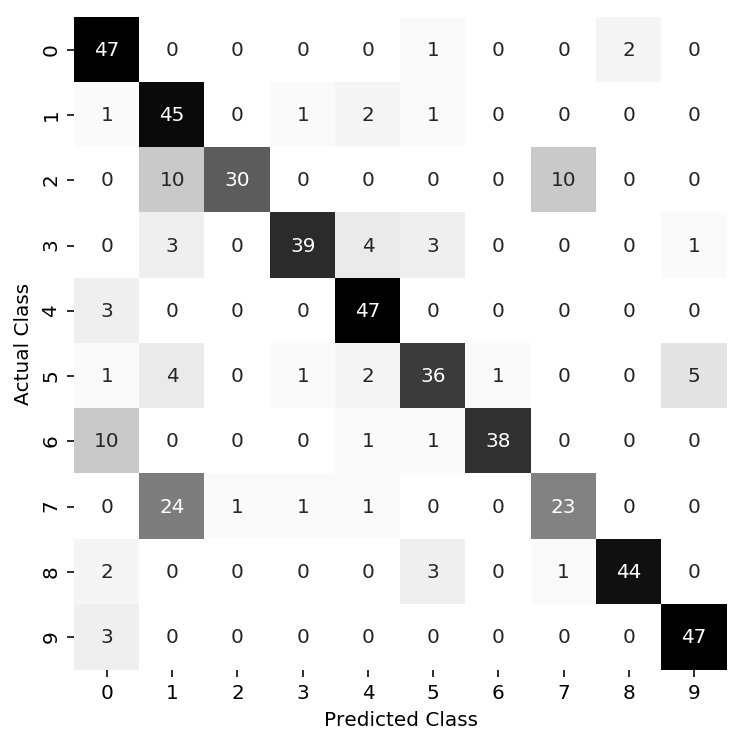

DecisionTreeClassifier


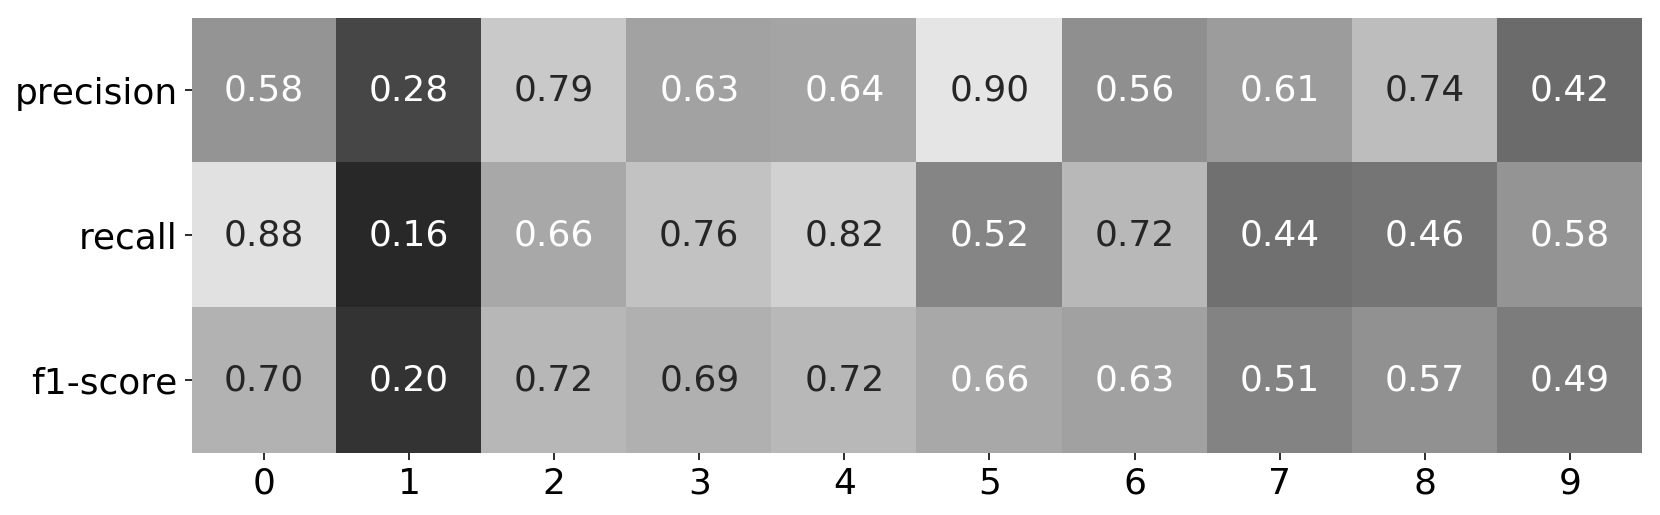

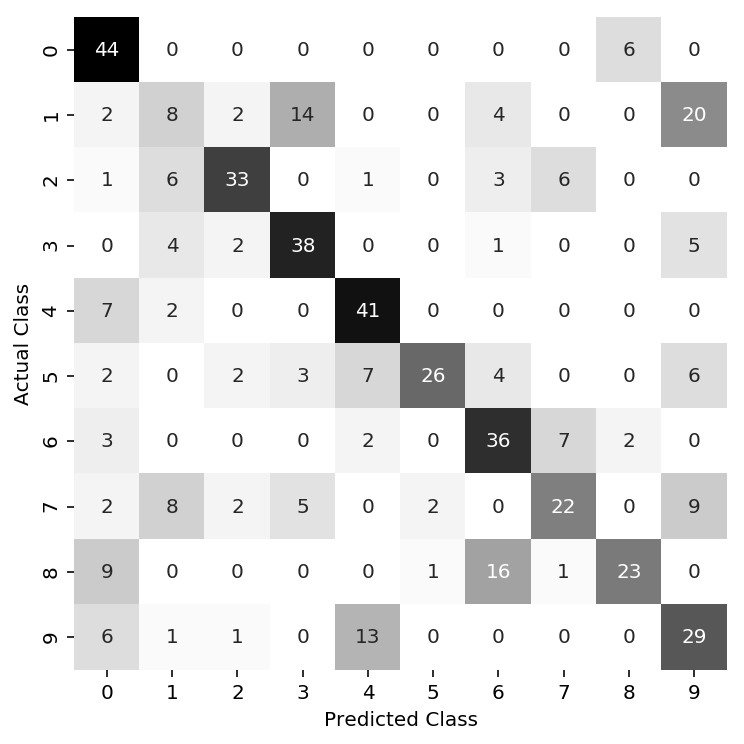

KNeighborsClassifier


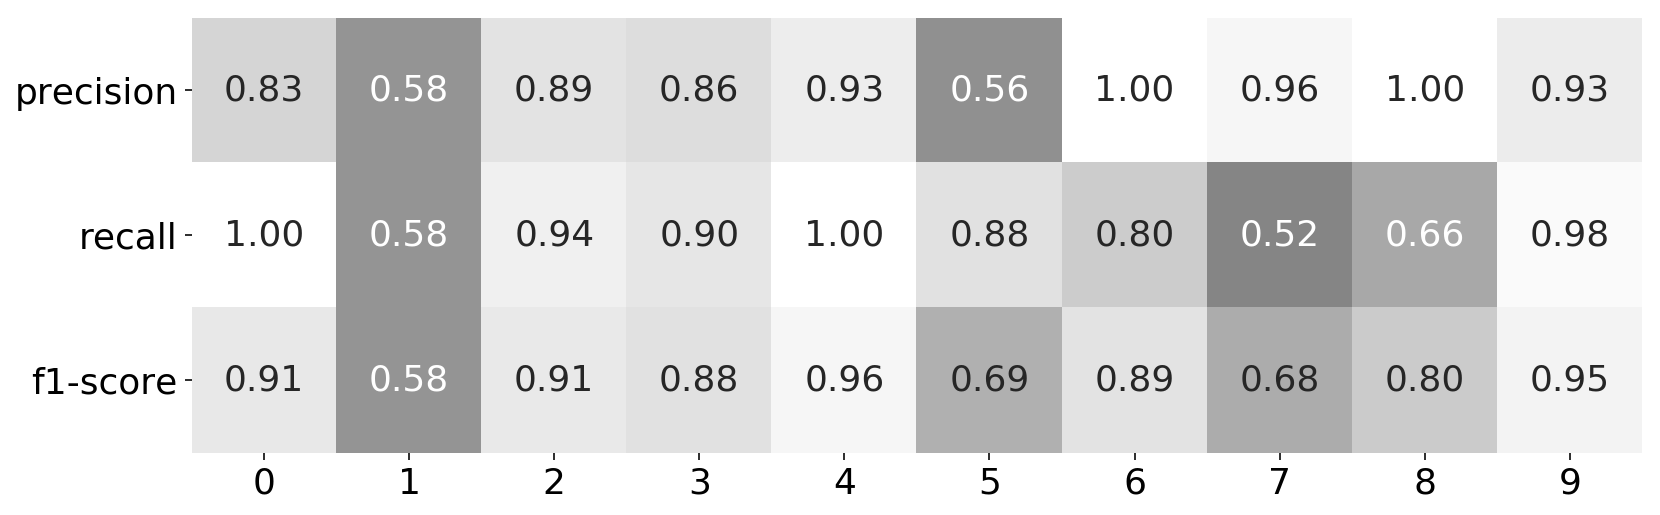

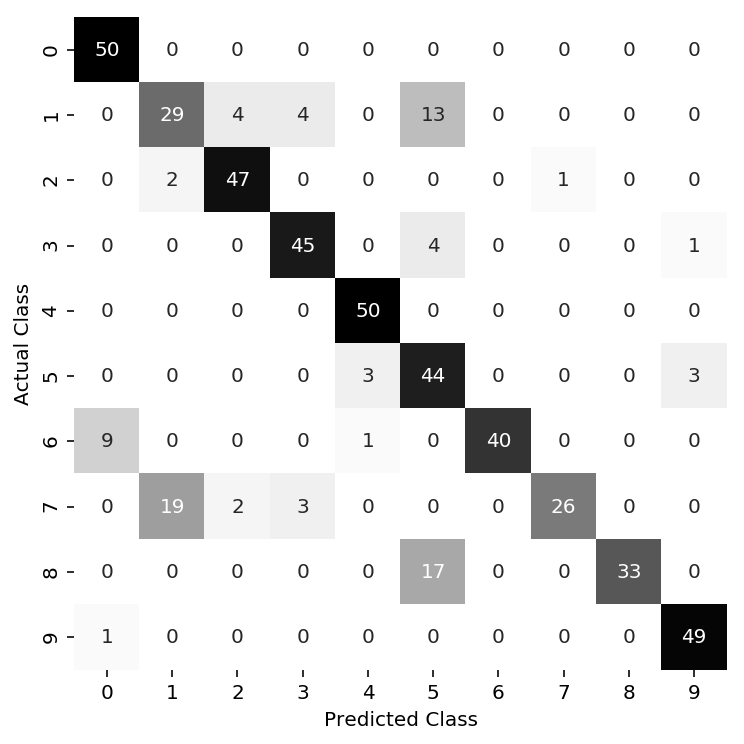

In [270]:
for model in [svm,tree,knn]:
    y_pred = model.predict(Xtest)
    print(model.__class__.__name__)
    prf=pd.DataFrame(classification_report(ytest, y_pred, output_dict=True)).round(3)
    prf = prf.drop('support', axis=0).drop(['micro avg','macro avg', 'weighted avg'], axis=1).iloc[[1,2,0]]
    plt.figure(figsize=(13,4))
    sns.heatmap(prf, annot=True, fmt='.2f', vmin=0, vmax=1,cbar=False, cmap='gray',annot_kws={"fontsize":18})
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18, rotation=0)
    plt.show()
    sns.heatmap(confusion_matrix(ytest, y_pred), annot=True, fmt='1', square=True, cbar=False, xticklabels=model.classes_, yticklabels=model.classes_, cmap='binary')
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    plt.show()

KNN


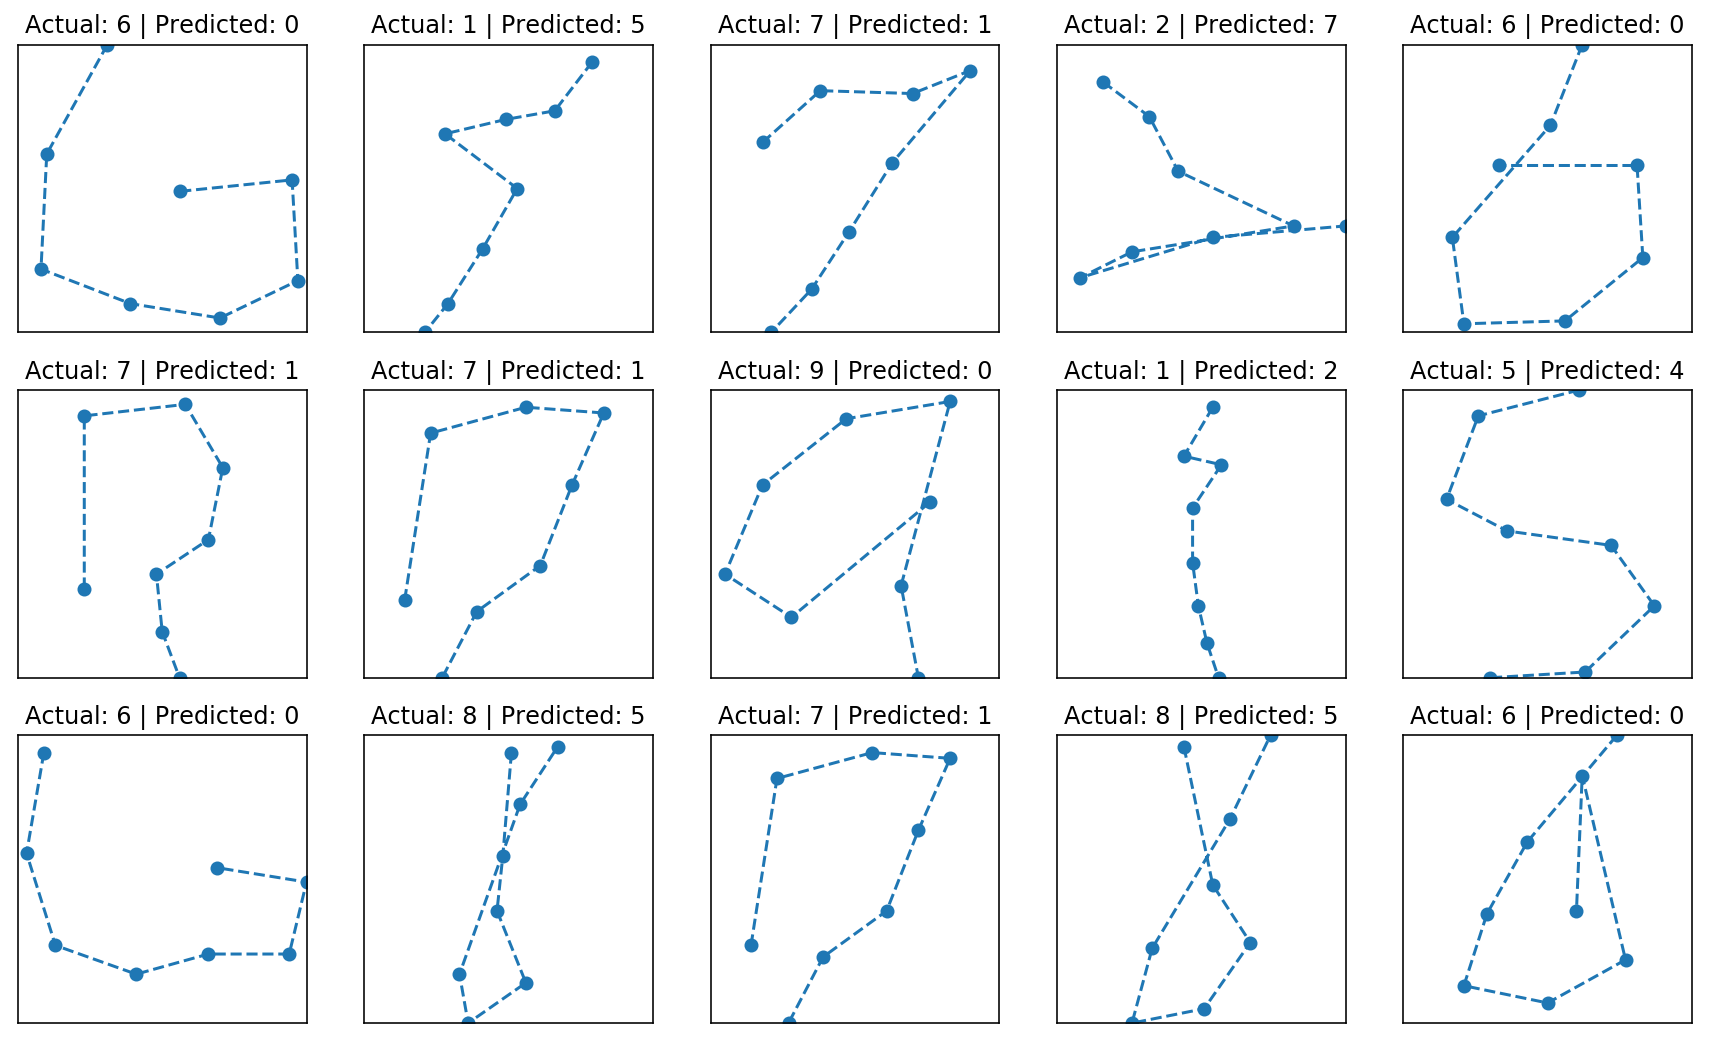

Decision Tree


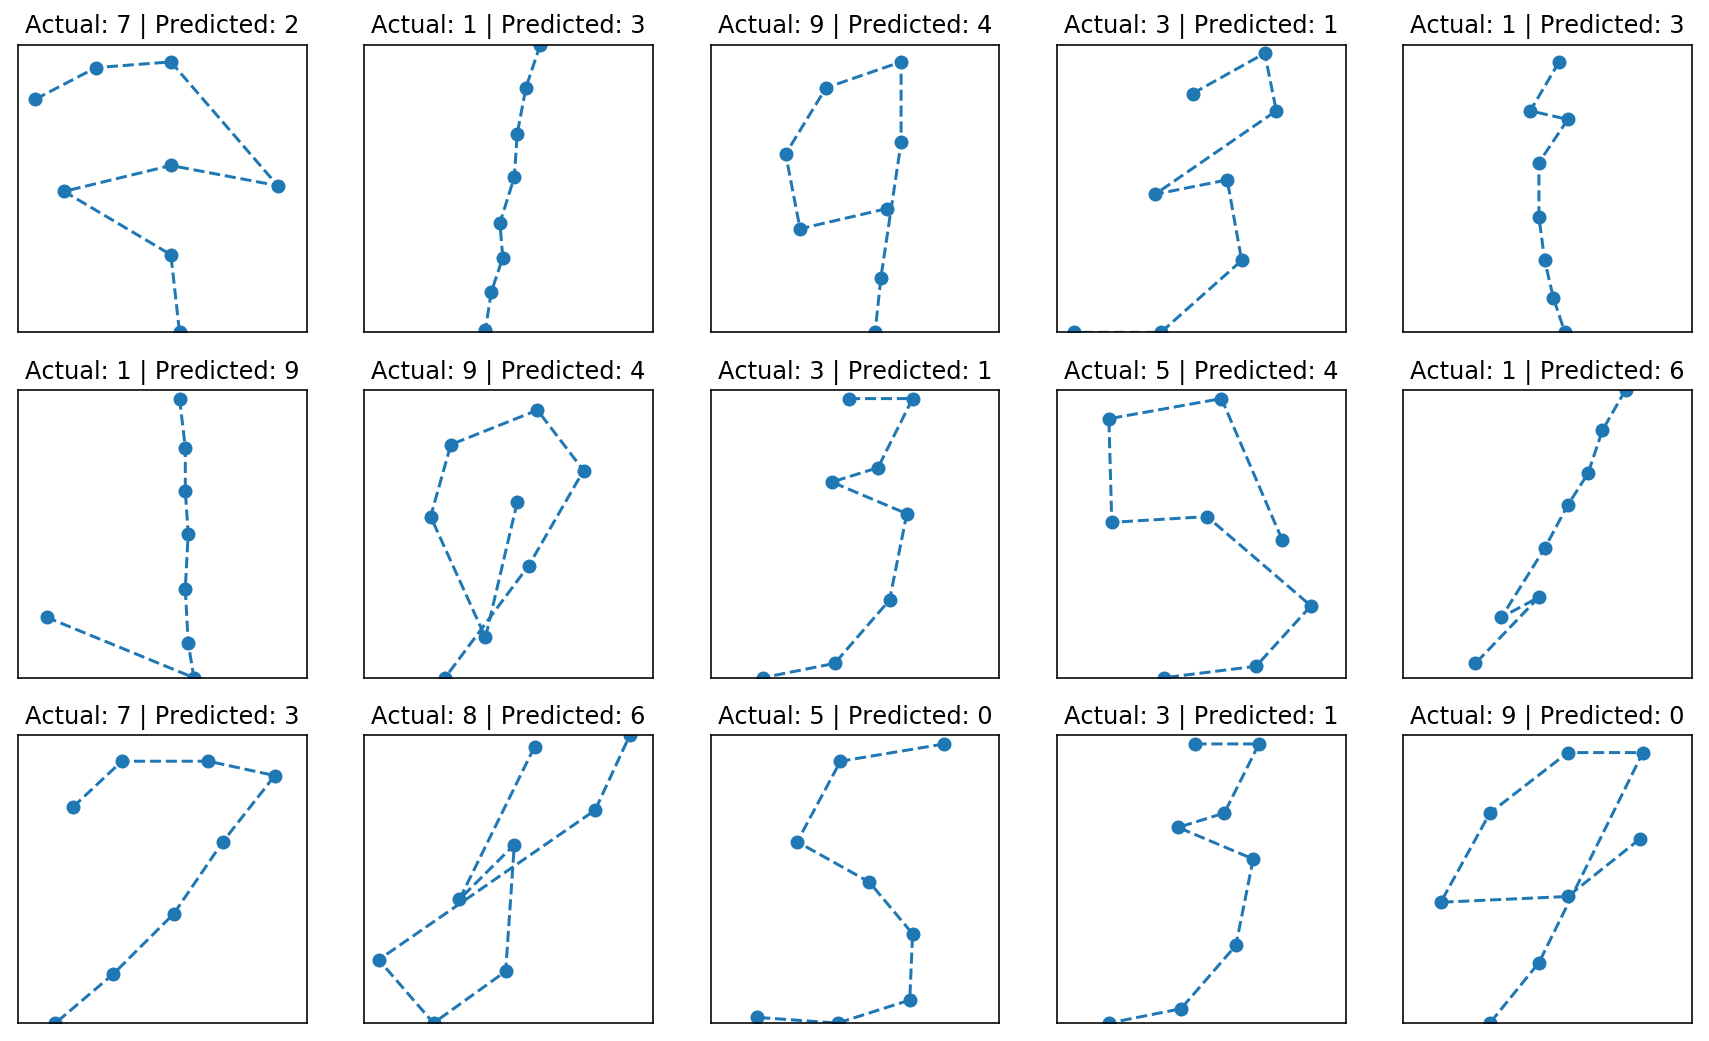

SVM


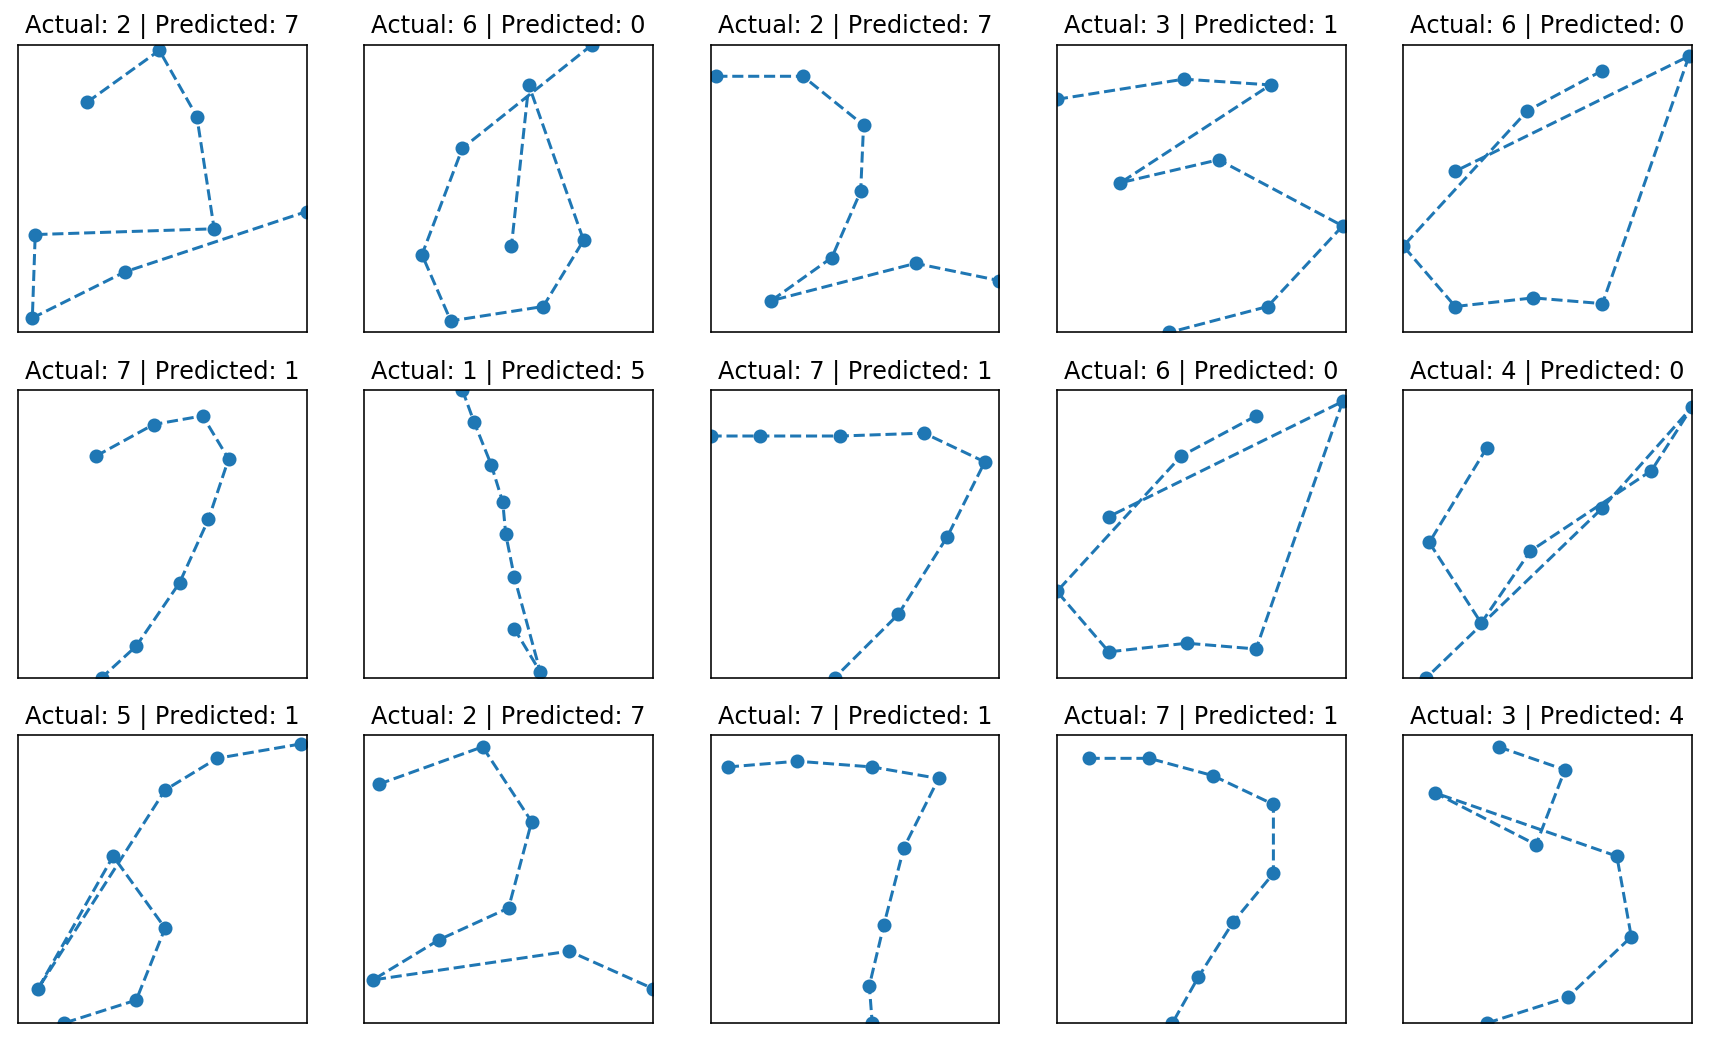

In [37]:
for model, name in [(knn, 'KNN'), (tree, 'Decision Tree'), (svm, 'SVM')]:
    np.random.seed(2)
    y_pred = model.predict(Xtest)
    misclassified = np.where(ytest!=y_pred)[0]
    r, c = 3,5
    samples = np.random.choice(misclassified, r*c)
    fig = plt.figure(figsize=(15,9))
    for i in range(r*c):
        plt.subplot(r,c,i+1)
        p = Xtest.iloc[samples[i]].values.reshape((8,2))
        plt.plot(p[:,0],p[:,1],'--o')
        plt.title('Actual: '+str(ytest[samples[i]])+' | Predicted: '+str(y_pred[samples[i]]))
        plt.xlim((0,100))
        plt.ylim((0,100))
        plt.xticks([])
        plt.yticks([])
#     fig.suptitle('Examples misclassified by '+ name)
    print(name)
    plt.show()